### Creating Time-Series Charts

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/misc/'
filename = 'ndvi_data.xlsx'
download(data_url + filename)

#### Data Pre-Processing

In [ ]:
filepath = os.path.join(data_folder, filename)
df = pd.read_excel(filepath)
df

We set the 'Date' column as the index of the dateframe. This will allow us to filter and plot the time-series data easily.

In [ ]:
df = df.set_index(pd.to_datetime(df['Date']))
df

Create a chart with time-series of values in the 'NDVI' column. We use `mdates` module to control the tick-marks on X-Axis.

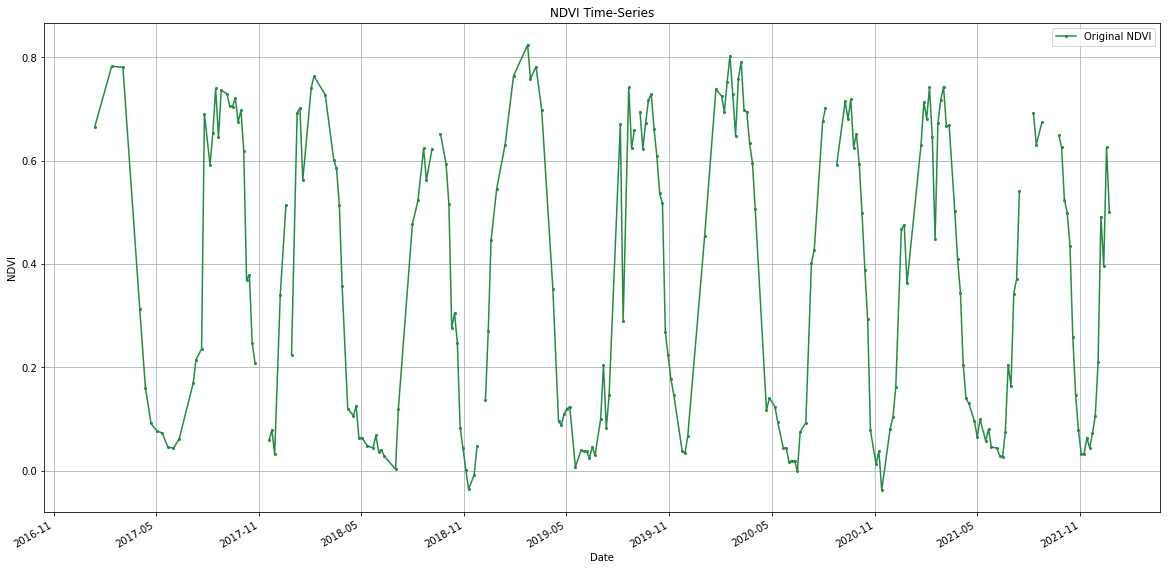

In [20]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
df.plot(y='NDVI', kind='line', ax=ax,
        marker='o', markersize=2, color='#238b45',
        label='Original NDVI')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax.grid('on')
ax.set_title('NDVI Time-Series')
ax.set_ylabel('NDVI')

# Save the plot
output_folder = 'output'
output_path = os.path.join(output_folder, 'ndvi_time_series.png')
plt.savefig(output_path)

plt.show()

#### Time Series Smoothing with Moving Average

Pandas has built-in method `rolling()` to allow us to compute moving averages. Let's smooth the time-series with a moving-window average.

In [ ]:
window_size_days = 30
window = '{}D'.format(window_size_days)
df_smooth = df.copy()
df_smooth['NDVI_smooth'] = df_smooth['NDVI'].rolling(window, center=True).mean()
df_smooth

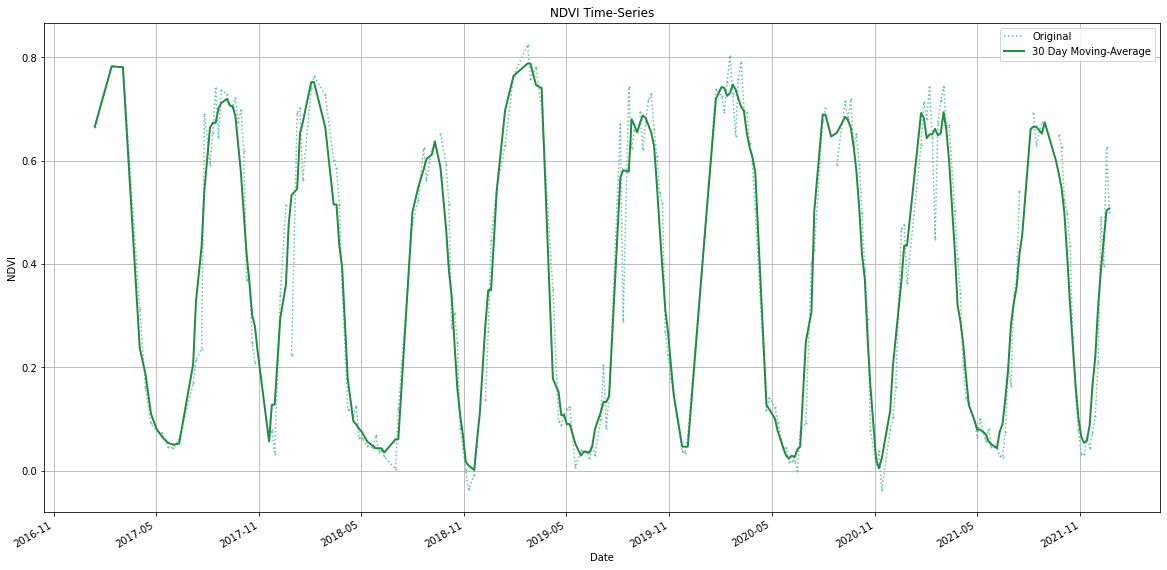

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20,10)
df_smooth.plot(y='NDVI', kind='line', ax=ax, 
                  marker='o', markersize=1, color='#66c2a4', linestyle='dotted',
                  label='Original')
df_smooth.plot(y='NDVI_smooth', kind='line', ax=ax,
                  marker='o', linewidth= 2, markersize=0, color='#238b45', 
                  label='{} Day Moving-Average'.format(window_size_days))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

ax.grid('on')

ax.set_title('NDVI Time-Series')
ax.set_ylabel('NDVI')

# Save the plot
output_folder = 'output'
output_path = os.path.join(output_folder, 'smooth_ndvi_time_series.png')
plt.savefig(output_path)

plt.show()